https://en.wikipedia.org/wiki/Spectral_density

<img src="https://plus.maths.org/content/sites/plus.maths.org/files/articles/2017/carola/Fourier_transform.gif">

In [1]:
import numpy
print('numpy',numpy.__version__)
import random
import pandas
print('pandas',pandas.__version__)
import matplotlib.pyplot as plt
import scipy
from scipy import signal

numpy 1.20.1
pandas 1.2.4


# Example of cyclic data and Fourier Transform

source: https://plot.ly/matplotlib/fft/

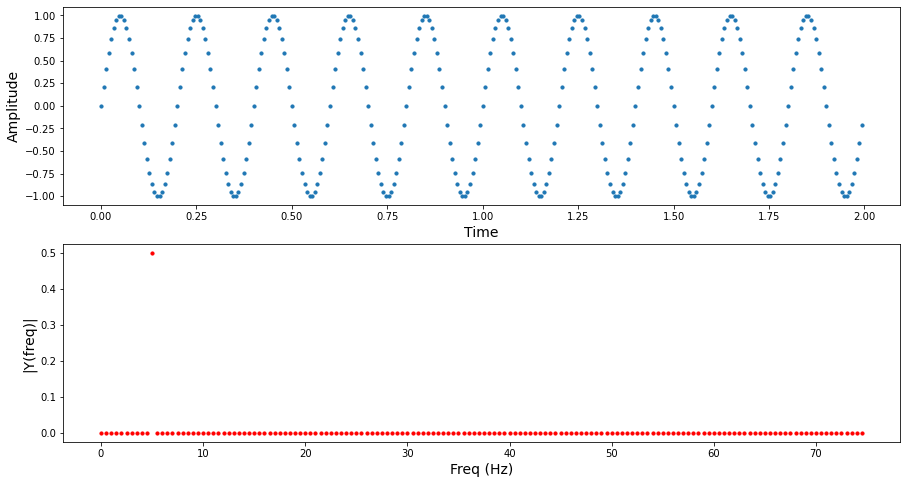

In [2]:
measurements_per_second = 150.0;  # sampling rate (samples per second)
measurement_period_in_seconds = 1.0/measurements_per_second; # sampling interval (aka period, in units of seconds)
max_time_in_seconds=2
t = numpy.arange(0,max_time_in_seconds,measurement_period_in_seconds) # time vector

freq_of_signal_in_Hz = 5;   # in Hertz (Hz)
y = numpy.sin(2*numpy.pi*freq_of_signal_in_Hz*t)

total_number_of_measurements = len(y) # length of the signal
k = numpy.arange(total_number_of_measurements)
number_of_periods = total_number_of_measurements/measurements_per_second
frq = k/number_of_periods # two sides frequency range
frq = frq[range(total_number_of_measurements//2)] # one side frequency range

normalized_fft_of_y = numpy.fft.fft(y)/total_number_of_measurements # fft computing and normalization
normalized_fft_of_y = normalized_fft_of_y[range(total_number_of_measurements//2)]

fig, ax = plt.subplots(2, 1)
ax[0].scatter(t,y,s=10)
ax[0].set_xlabel('Time',fontsize=14)
ax[0].set_ylabel('Amplitude',fontsize=14)
ax[1].scatter(frq,abs(normalized_fft_of_y),color='r',s=10) # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)',fontsize=14)
ax[1].set_ylabel('|Y(freq)|',fontsize=14);
plt.gcf().set_size_inches(15,8)

## two waves

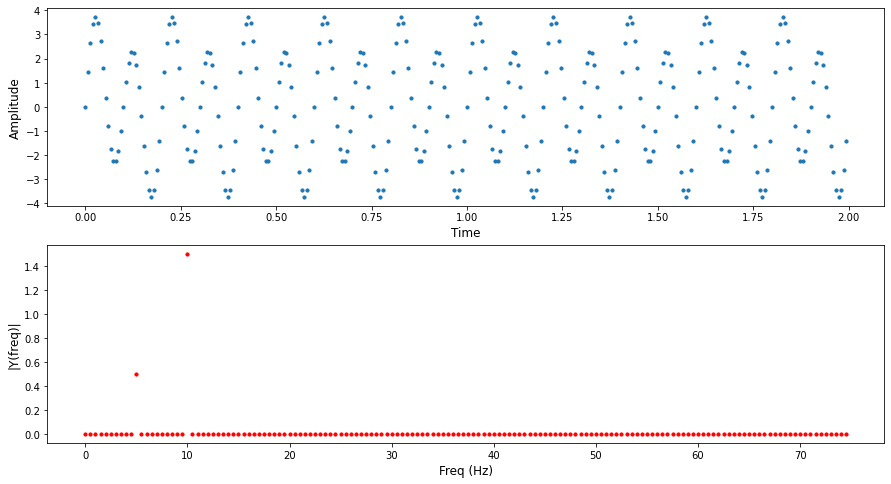

In [3]:
max_time_in_seconds=2
t = numpy.arange(0,max_time_in_seconds,measurement_period_in_seconds) # time vector

freq_of_signal_in_Hz = 5;   # in Hertz (Hz)
y = numpy.sin(2*numpy.pi*freq_of_signal_in_Hz*t) + 3*numpy.sin(2*2*numpy.pi*freq_of_signal_in_Hz*t)

total_number_of_measurements = len(y) # length of the signal
k = numpy.arange(total_number_of_measurements)
number_of_periods = total_number_of_measurements/measurements_per_second
frq = k/number_of_periods # two sides frequency range
frq = frq[range(total_number_of_measurements//2)] # one side frequency range

normalized_fft_of_y = numpy.fft.fft(y)/total_number_of_measurements # fft computing and normalization
normalized_fft_of_y = normalized_fft_of_y[range(total_number_of_measurements//2)]

fig, ax = plt.subplots(2, 1)
ax[0].scatter(t,y,s=10)
ax[0].set_xlabel('Time',fontsize=12)
ax[0].set_ylabel('Amplitude',fontsize=12)
ax[1].scatter(frq,abs(normalized_fft_of_y),color='r',s=10) # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)',fontsize=12)
ax[1].set_ylabel('|Y(freq)|',fontsize=12);
plt.gcf().set_size_inches(15,8)

## with noise

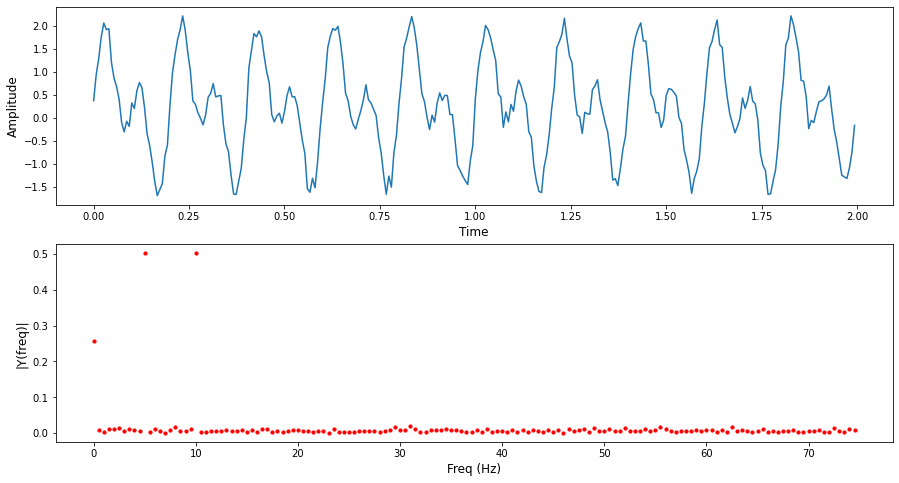

In [4]:
max_time_in_seconds=2
t = numpy.arange(0,max_time_in_seconds,measurement_period_in_seconds) # time vector

noise = 0.0005*numpy.asarray(random.sample(range(0,1000),len(t)))

freq_of_signal_in_Hz = 5;   # in Hertz (Hz)
y = numpy.sin(2*numpy.pi*freq_of_signal_in_Hz*t) + numpy.sin(2*2*numpy.pi*freq_of_signal_in_Hz*t)+noise

total_number_of_measurements = len(y) # length of the signal
k = numpy.arange(total_number_of_measurements)
number_of_periods = total_number_of_measurements/measurements_per_second
frq = k/number_of_periods # two sides frequency range
frq = frq[range(total_number_of_measurements//2)] # one side frequency range

normalized_fft_of_y = numpy.fft.fft(y)/total_number_of_measurements # fft computing and normalization
normalized_fft_of_y = normalized_fft_of_y[range(total_number_of_measurements//2)]

fig, ax = plt.subplots(2, 1)
#ax[0].scatter(t,y,s=10)
ax[0].plot(t,y)
ax[0].set_xlabel('Time',fontsize=12)
ax[0].set_ylabel('Amplitude',fontsize=12)
ax[1].scatter(frq,abs(normalized_fft_of_y),color='r',s=10) # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)',fontsize=12)
ax[1].set_ylabel('|Y(freq)|',fontsize=12);
plt.gcf().set_size_inches(15,8)

# even more noise

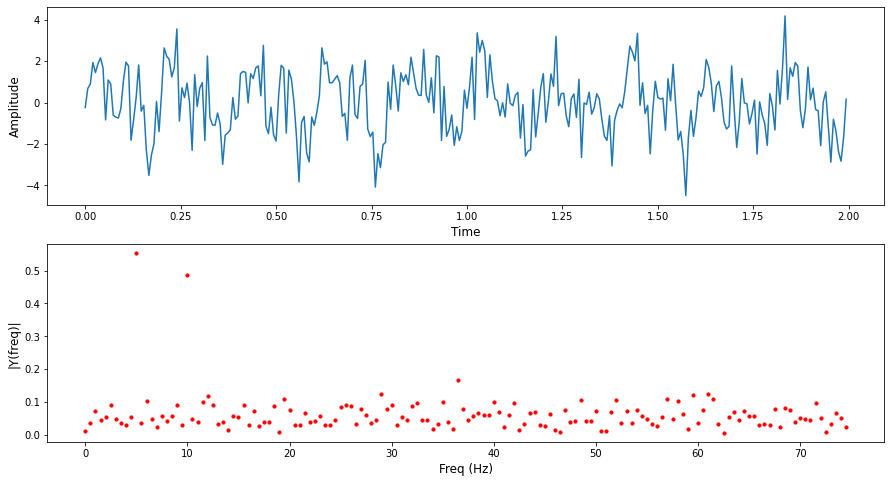

In [5]:


max_time_in_seconds=2
t = numpy.arange(0,max_time_in_seconds,measurement_period_in_seconds) # time vector

noise = numpy.random.randn(len(t))

freq_of_signal_in_Hz = 5;   # in Hertz (Hz)
y = numpy.sin(2*numpy.pi*freq_of_signal_in_Hz*t) + numpy.sin(2*2*numpy.pi*freq_of_signal_in_Hz*t)+noise

total_number_of_measurements = len(y) # length of the signal
k = numpy.arange(total_number_of_measurements)
number_of_periods = total_number_of_measurements/measurements_per_second
frq = k/number_of_periods # two sides frequency range
frq = frq[range(total_number_of_measurements//2)] # one side frequency range

normalized_fft_of_y = numpy.fft.fft(y)/total_number_of_measurements # fft computing and normalization
normalized_fft_of_y = normalized_fft_of_y[range(total_number_of_measurements//2)]

fig, ax = plt.subplots(2, 1)
#ax[0].scatter(t,y,s=10)
ax[0].plot(t,y)
ax[0].set_xlabel('Time',fontsize=12)
ax[0].set_ylabel('Amplitude',fontsize=12)
ax[1].scatter(frq,abs(normalized_fft_of_y),color='r',s=10) # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)',fontsize=12)
ax[1].set_ylabel('|Y(freq)|',fontsize=12);
plt.gcf().set_size_inches(15,8)

## Can we clean?

In [6]:
clean_y = None

for i, f in enumerate(frq):
    if abs(normalized_fft_of_y)[i] > 0.3: # setting a threshold to filter and get only if it's greater...
        signal = numpy.sin(2*numpy.pi* f * t)
        if clean_y is None: 
            clean_y = signal
            continue
            
        clean_y += signal

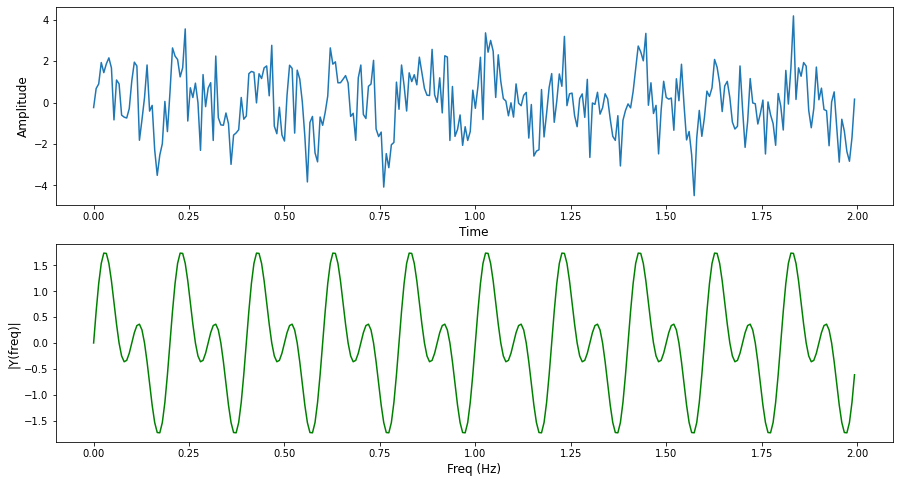

In [7]:
fig, ax = plt.subplots(2, 1)
#ax[0].scatter(t,y,s=10)
ax[0].plot(t,y)
ax[0].set_xlabel('Time',fontsize=12)
ax[0].set_ylabel('Amplitude',fontsize=12)

ax[1].plot(t, clean_y, color='g') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)',fontsize=12)
ax[1].set_ylabel('|Y(freq)|',fontsize=12);
plt.gcf().set_size_inches(15,8)

# second example

source: https://gist.github.com/jedludlow/3919130

$f_s$ is the sampling frequency, while $f$ is a base frequency for the signal content. We create a signal that contains components at a couple of multiples of this base frequency. Note the amplitudes here since we will be trying to extract those correctly from the FFT later.

In [8]:
f_s = 50.0 # Hz
f = 1.0 # Hz
time = numpy.arange(0.0, 3.0, 1/f_s)
x = 5 * numpy.sin(2 * numpy.pi * f * time) + 2 * numpy.sin(10 * 2 * numpy.pi * f * time)

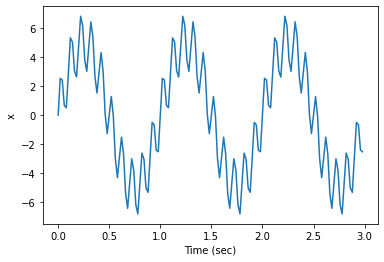

In [9]:
plt.plot(time, x)
plt.xlabel("Time (sec)")
plt.ylabel("x");

In [10]:
fft_x = numpy.fft.fft(x)
n = len(fft_x)
freq = numpy.fft.fftfreq(n, 1/f_s)

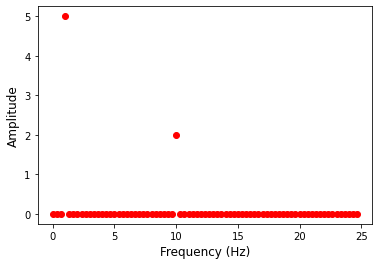

In [11]:
fft_x_half = (2.0 / n) * fft_x[:n//2]
plt.scatter(freq[:n//2], numpy.abs(fft_x_half),color='r')
plt.xlabel("Frequency (Hz)",fontsize=12)
plt.ylabel("Amplitude",fontsize=12);